<a href="https://colab.research.google.com/github/daeun118/24_1_DataMining/blob/main/%EC%9E%AC%EB%82%9C%EB%AC%B8%EC%9E%90%EB%B6%84%EB%A5%98_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 28.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import re

In [3]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/sos.csv", encoding = 'utf-8')
df.head()

,연,월,일,시,분,수신지역,송출내용,target
0,2020,1,26,9,9,중구,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...,기타
1,2020,1,28,16,59,광진구,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...,전염병
2,2020,1,30,9,49,송파구,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...,전염병
3,2020,1,31,14,31,강남구,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,...",전염병
4,2020,1,31,15,5,강남구,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후...",전염병


In [5]:
# 클러스터링을 위해 송출내용 제외하고 모두 제거
df = df.drop(columns=['연', '월', '일', '시', '분', '수신지역', 'target'])
df.head()

,송출내용
0,[중구청] 오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우...
1,[광진구청] 신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻...
2,[송파구청]감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다...
3,"[강남구]중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,..."
4,"[강남구]중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후..."


In [6]:
import re

# 정규 표현식 패턴 설정
pattern = r'\[[^\]]+\]'

# 정규 표현식을 사용하여 패턴을 찾아서 삭제
df['송출내용'] = df['송출내용'].apply(lambda x: re.sub(pattern, '', x))

df.head()

,송출내용
0,오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우회하여 주...
1,신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻기 중국방문...
2,감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다. 확진자는...
3,"중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,인후통 등..."
4,"중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후통등) 발..."


## 불용어 제거

In [7]:
# 불용어 사전 불러오기

# 한글 불용어 사전 파일 경로
stopwords_path = '/content/drive/MyDrive/데이터마이닝/stopwords-ko.txt'

# 파일 읽기
with open(stopwords_path, "r", encoding="utf-8") as file:
    stopwords = file.readlines()

# 각 불용어의 좌우 공백과 개행문자 제거
stopwords = [word.strip() for word in stopwords]
# 추가 불용어
stopwords.extend(['[', ']'])
print(stopwords)

['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '...', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '\\', '^', '_', '`', '|', '~', '·', '—', '——', '‘', '’', '“', '”', '…', '、', '。', '〈', '〉', '《', '》', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '

In [8]:
# 불용어 처리

# Okt 형태소 분석기 생성
okt = Okt()

# 특수 단어 리스트 정의
special_words = ['확진자', '서울의료원']

# 텍스트 전처리 함수 정의
def preprocess_text_korean(text):
    # 특수 문자 제거
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)

    # 형태소 분석 및 불용어 제거
    tokens = okt.pos(text, stem=True)

    # 명사와 동사/형용사만 남기기 및 불용어 제거
    tokens = [word for word, pos in tokens if pos in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]

    # 특정 단어들을 하나의 토큰으로 결합
    for special_word in special_words:
        while special_word in tokens:
            index = tokens.index(special_word)
            tokens[index:index + len(special_word)] = [special_word]

    # 토큰을 다시 문자열로 합침
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# '송출내용' 열에 전처리 적용
df['preprocessed_송출내용'] = df['송출내용'].apply(preprocess_text_korean)

# 변경된 내용을 확인하기 위해 데이터프레임의 처음 몇 행 출력
df[['송출내용', 'preprocessed_송출내용']].head(10)


,송출내용,preprocessed_송출내용
0,오늘 07:00경 중구 장충동 앰버서더호텔 내 화재 발생. 이 지역을 우회하여 주...,오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인근 주민...
1,신종 코로나바이러스감염증 예방수칙 마스크 착용 흐르는물 30초이상 손씻기 중국방문...,신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 중국 방문 ...
2,감염증 대응을 위해 구청장 중심으로 24시간 대책본부를 운영하고 있습니다. 확진자는...,감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시 보건소 문...
3,"중국 방문 후 14일 이내에 발열(37.5도 이상) 또는 호흡기증상(기침,인후통 등...",중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 대책 부...
4,"중국 방문 후 14일이내에 발열(37.5도이상) 또는 호흡기증상(기침,인후통등) 발...",중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대책 부로...
5,은평성모병원환자코로나19추가확진자발생.성모병원부분일시폐쇄.발열호흡기증상시1339 또...,은평 병원 환자 코로나 추가 확 진자 발생 성모 병원 부분 일시 폐쇄 발열 호흡기 ...
6,"코로나19 2번째 확진자 발생. 성내동 거주 66세(중국인), 2.24. 확진판정,...",코로나 확 진자 발생 성내동 거주 중국인 확진 판정 흑석동 중대 병원 격리 자세하다...
7,"코로나19 확진자 2명 추가 발생, 23일 문정동 확진자의 가족으로 서울의료원에 ...",코로나 확 진자 명 추가 발생 문정동 확 진자 가족 의료 격리 조치 하다 자세하다 ...
8,"금일코로나19확진추가2명발생,2.1부터은평성모병원입퇴원주민중발열 호흡기증상시보건소0...",금일 코로나 확진 추가 발생 은평 성모 병원 입 퇴원 주민 발열 호흡기 증상 보건소...
9,"코로나19 확진자 2명 추가 발생, 자세한내용은 강동구 홈페이지를 참고 바랍니다.",코로나 확 진자 명 추가 발생 자세하다 내용 강동구 홈페이지 참고 바라다


In [9]:
# 전처리된 송출내용만 남긴 데이터프레임: new_df
new_df = df.drop(columns=['송출내용'])
new_df.head()

,preprocessed_송출내용
0,오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인근 주민...
1,신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 중국 방문 ...
2,감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시 보건소 문...
3,중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 대책 부...
4,중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대책 부로...


## TF-IDF

In [10]:
# TF-IDF 벡터라이저 생성
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)  # max_features는 필요에 따라 조정 가능

# 텍스트 데이터를 학습 및 변환
tfidf_matrix = vectorizer.fit_transform(new_df['preprocessed_송출내용'])

# 결과 매트릭스의 형태 출력
print(tfidf_matrix.shape)
tfidf_matrix

# tfidf_matrix는 (문서 수*단어 수)의 행렬. 단어 수는 max_features=100으로 지정함
# 행렬의 값은 각 문서에서 해당 단어의 중요도(TF-IDF값)을 나타낸 것

(9348, 100)


<9348x100 sparse matrix of type '<class 'numpy.float64'>'
	with 87476 stored elements in Compressed Sparse Row format>

In [11]:
tfidf_dense = tfidf_matrix.toarray()
tfidf_dense.shape

(9348, 100)

In [12]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (거리 기반 클러스터링에 스케일링 필요)
scaler = StandardScaler()
scaled_tfidf = scaler.fit_transform(tfidf_dense)
scaled_tfidf.shape

(9348, 100)

In [25]:
scaled_tfidf_df = pd.DataFrame(scaled_tfidf, columns = vectorizer.get_feature_names_out())
scaled_tfidf_df

,가깝다,가족,강서구,거리,거주지,검사,격리,결과,경로,공개,...,채널,추가,추후,카카오,코로나,하다,해주다,현재,홈페이지,확인
0,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,1.009603,-0.137183,-0.195982,-0.925041,-0.446814
1,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,-0.533856,-0.137183,-0.195982,-0.925041,-0.446814
2,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,-0.533856,-0.137183,-0.195982,-0.925041,-0.446814
3,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,-0.533856,-0.137183,-0.195982,-0.925041,-0.446814
4,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,-0.533856,-0.137183,-0.195982,-0.925041,-0.446814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,-0.533856,-0.137183,-0.195982,-0.925041,-0.446814
9344,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,2.219443,-0.137183,-0.195982,-0.925041,-0.446814
9345,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,2.137489,-0.137183,-0.195982,-0.925041,-0.446814
9346,-0.195993,-0.178289,-0.180621,-0.277417,-0.167665,-0.427924,-0.220432,-0.30342,-0.145053,-0.564277,...,-0.140914,-0.289634,-0.242714,-0.162418,-0.574206,0.930558,-0.137183,-0.195982,-0.925041,-0.446814


## 계층적 클러스터링

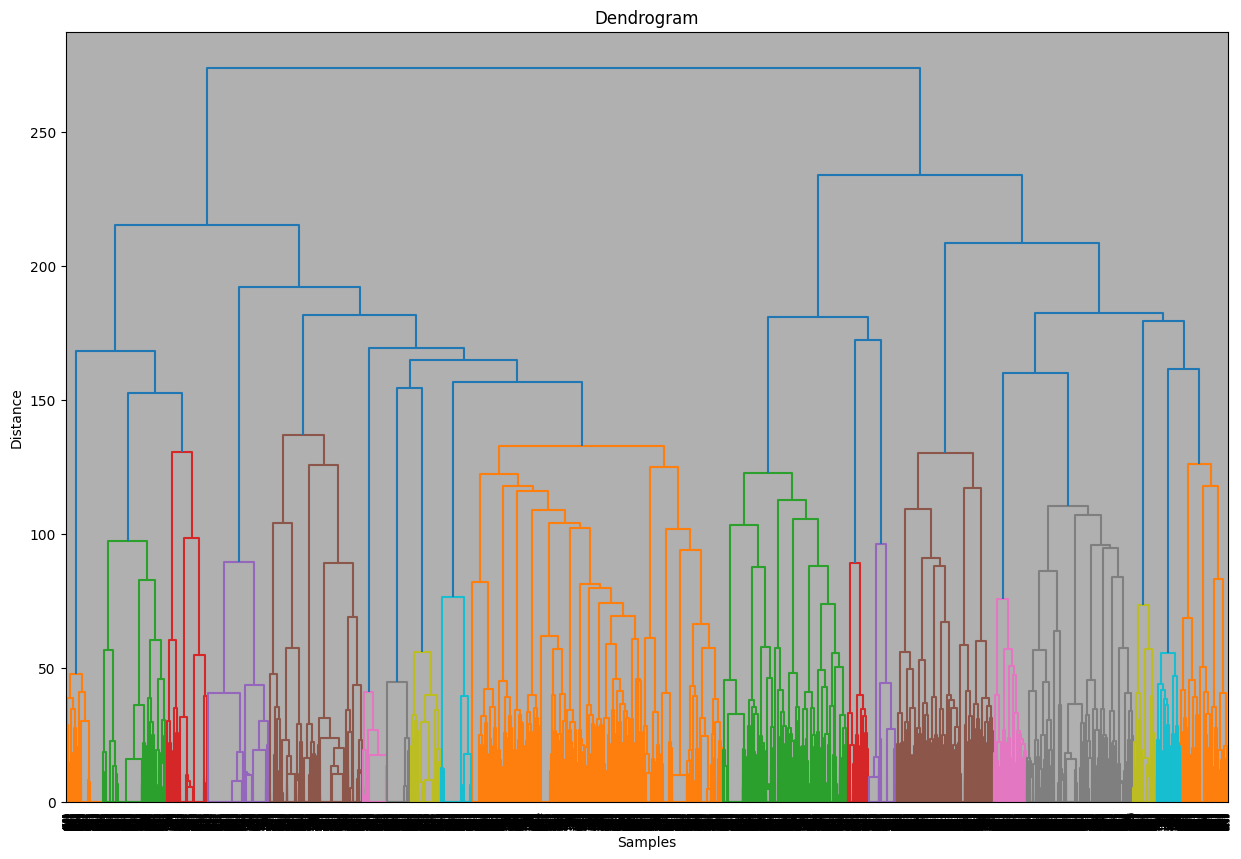

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 덴드로그램 시각화 (계층적 클러스터링)
linked = linkage(scaled_tfidf, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True, color_threshold=150)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


In [14]:
from sklearn.cluster import AgglomerativeClustering
# 덴드로그램에서 클러스터를 잘라내기 위해 특정 높이 설정
color_threshold = 150  # 이 값을 적절히 설정하여 클러스터 수를 조절
clusters = fcluster(linked, color_threshold, criterion='distance')

# 결정한 클러스터 수 출력
num_clusters = len(set(clusters))
print(f'Number of clusters determined from dendrogram: {num_clusters}')

# Agglomerative Clustering 수행
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hierarchical.fit_predict(scaled_tfidf)
new_df['cluster'] = cluster_labels

# 클러스터링 결과 확인
print(new_df[['preprocessed_송출내용', 'cluster']].head(10))

# 클러스터 수 및 각 클러스터에 속하는 포인트 수 확인
print(f'Number of clusters: {num_clusters}')
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)


Number of clusters determined from dendrogram: 19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


                                   preprocessed_송출내용  cluster
0  오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인근 주민...        4
1  신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 중국 방문 ...        7
2  감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시 보건소 문...        2
3  중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 대책 부...        7
4  중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대책 부로...        7
5  은평 병원 환자 코로나 추가 확 진자 발생 성모 병원 부분 일시 폐쇄 발열 호흡기 ...        7
6  코로나 확 진자 발생 성내동 거주 중국인 확진 판정 흑석동 중대 병원 격리 자세하다...        2
7  코로나 확 진자 명 추가 발생 문정동 확 진자 가족 의료 격리 조치 하다 자세하다 ...        2
8  금일 코로나 확진 추가 발생 은평 성모 병원 입 퇴원 주민 발열 호흡기 증상 보건소...        7
9           코로나 확 진자 명 추가 발생 자세하다 내용 강동구 홈페이지 참고 바라다        2
Number of clusters: 19
2     2020
3     1002
7      855
4      784
0      753
8      515
5      498
6      385
1      329
12     298
15     262
18     247
16     246
13     227
11     192
9      190
14     189
17     187
10     169
Name: count, dtype: int64


<ipython-input-23-abd960f32b8b>:19: UserWarning: 
The palette list has fewer values (8) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette=sns.color_palette("hsv", 8), data=tsne_df, legend="full", alpha=0.6)


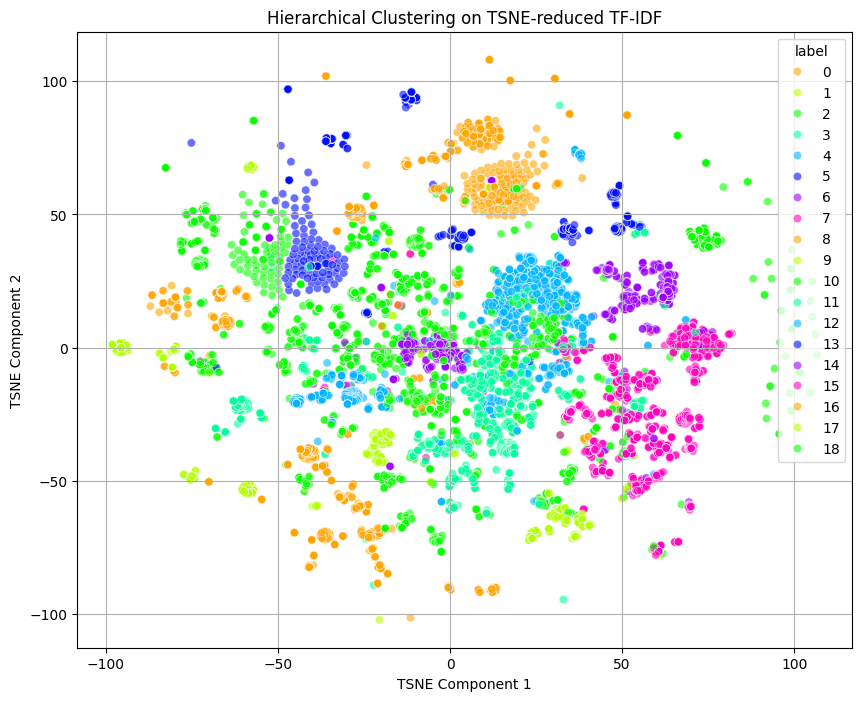

In [23]:
from sklearn.manifold import TSNE
import seaborn as sns

tfidf_newdf = vectorizer.fit_transform(new_df['preprocessed_송출내용']).toarray()

# TSNE를 사용하여 2차원으로 축소
tsne_newdf = TSNE(n_components=2, random_state=42)
tsne_results_newdf = tsne_newdf.fit_transform(tfidf_newdf)

# 시각화를 위해 t-SNE 결과를 DataFrame으로 변환
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results_newdf[:, 0],
    'TSNE2': tsne_results_newdf[:, 1],
    'label': new_df['cluster']  # 라벨 정보 추가
})

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette=sns.color_palette("hsv", 8), data=tsne_df, legend="full", alpha=0.6)
plt.title('Hierarchical Clustering on TSNE-reduced TF-IDF')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()

## 비슷한 클러스터끼리 병합

### 1차 병합

In [15]:
# 2, 3번 병합(추후 다시 클러스터링 필요) -> 23번으로 병합
# 1, 8, 12, 17번 병합 -> 117번으로 병합
# 5, 16번 병합 -> 516번으로 병합
# 7, 9번 병합 -> 79번으로 병합

# 2, 3번 병합: 확진자 발생 안내+일반 기상상황 혼합
new_df['merged_cluster'] = new_df['cluster']
# 클러스터 2와 3을 병합하여 새로운 클러스터 20으로 지정
new_df.loc[new_df['cluster'].isin([2, 3]), 'merged_cluster'] = 20

# 1, 5, 8, 12, 16, 17, 18번 병합: 역학조사
# 클러스터 1, 8, 12, 17번을 병합하여 새로운 클러스터 21번으로 지정
new_df.loc[new_df['cluster'].isin([1, 5, 8, 12, 16, 17, 18]), 'merged_cluster'] = 21

# 7, 9번 병합: 코로나검사 권장
# 클러스터 7, 9번을 병합하여 새로운 클러스터 23번으로 지정
new_df.loc[new_df['cluster'].isin([7, 9]), 'merged_cluster'] = 23

# 10, 11, 13, 14번 병합: 방역
# 클러스터 10, 13번을 병합하여 새로운 클러스터 24번으로 지정
new_df.loc[new_df['cluster'].isin([10, 11, 13, 14]), 'merged_cluster'] = 24

# 결과 확인
new_df


,preprocessed_송출내용,cluster,merged_cluster
0,오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인근 주민...,4,4
1,신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 중국 방문 ...,7,23
2,감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시 보건소 문...,2,20
3,중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 대책 부...,7,23
4,중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대책 부로...,7,23
...,...,...,...
9343,태풍 북상 많다 비 강풍 예상 되다 안양천 수위 상승 산책로 자전거 도로 통제 오니...,4,4
9344,태풍 북상 중 많다 비 강풍 예상 되다 외출 자제 하다 주시 하천 출입 금지 배수 ...,4,4
9345,태풍 카눈 따르다 강풍 산림 내 수목 전도 우려 되다 국사봉 까치산 달산 출입 금 ...,4,4
9346,관악구 지역 집중호우 예상 되다 주민 별빛 린 위험 지역 접근 금지 하다 배수로 정...,2,20


In [16]:
# 1차 병합된 데이터프레임: new_df에서 병합 전 클러스터 컬럼 제거, 클러스터명 순으로 정렬 -> new_df2
# 클러스터명 순으로 정렬 후 클러스터명 0부터 다시 지정
new_df2 = new_df.drop(columns=['cluster']).sort_values(by='merged_cluster')
print(new_df2['merged_cluster'].value_counts())

# 클러스터명 재할당
new_df2['merged_cluster'] = pd.factorize(new_df2['merged_cluster'])[0]
print(new_df2['merged_cluster'].value_counts())
new_df2


merged_cluster
20    3022
21    2320
23    1045
4      784
24     777
0      753
6      385
15     262
Name: count, dtype: int64
merged_cluster
4    3022
5    2320
6    1045
1     784
7     777
0     753
2     385
3     262
Name: count, dtype: int64


,preprocessed_송출내용,merged_cluster
7743,확 진자 명번 발생 안내 세부 사항 양천 블로그 참조,0
6799,강서구 코로나 확 진자 명 발생 안내 상세 내용 블로그 참조 바라다,0
6786,번 추가 확 진자 발생 번 확 진자 역학 조사 완료 홈페이지 참조 바라다,0
6775,확 진자 명번 발생 안내 세부 사항 양천구 블로그 참조,0
6767,강서구 코로나 확 진자 명 발생 안내 상세 내용 블로그 참조 바라다,0
...,...,...
4925,확 진자 발생 모임 약속 취소 마스크 착용 사회 거리 두기 준수 카카오 톡 채널 확인,7
6562,확 진자 명 발생 세부 내용 블로그 확인 바라다 사적 모임 금지 방역 칙 준수 바라다,7
1073,관내 번 확진 환자 세 삼선동 발생 거주지 방역 완료 자세하다 사항 북구청 홈페이지...,7
3480,번 확 진자 발생 거주지 방역 완료 자세하다 사항 홈페이지 블로그 참고 바라다,7


In [17]:
'''
유사한 것끼리 병합 후

클러스터명 | 데이터 수 | 내용

0	  753     확진자 발생안내
1	  784     기상
2	  385     백신, 교통, 확진자발생
3	  262     임시선별소
4	  3022    확진자 발생, 기상
5	  2320    역학조사
6	  1045    검사 권장
7	  777     방역

'''

'\n유사한 것끼리 병합 후\n\n클러스터명 | 데이터 수 | 내용\n\n0\t  753     확진자 발생안내\n1\t  784     기상\n2\t  385     백신, 교통, 확진자발생\n3\t  262     임시선별소\n4\t  3022    확진자 발생, 기상\n5\t  2320    역학조사\n6\t  1045    검사 권장\n7\t  777     방역\n\n'

In [18]:
new_df2 = new_df2.sort_index().rename(columns={'merged_cluster': 'label'})
new_df2 # 라벨링한 데이터프레임

,preprocessed_송출내용,label
0,오늘 경 중구 장충동 앰버 서다 호텔 내 화재 발생 지역 우회 하다 주시 인근 주민...,1
1,신종 코로나바이러스 감염증 예방 칙 마스크 착용 흐르다 물 초이 손씻기 중국 방문 ...,6
2,감염증 대응 위해 청장 중심 대책 본부 운영 확 진자 없다 발열 증상 시 보건소 문...,4
3,중국 방문 후 이내 발열 호흡기 증상 기침 후통 발 현시 강남구 재난 안전 대책 부...,6
4,중국 방문 후 내 발열 호흡기 증상 기침 후통 발현 시 강남구 재난 안전 대책 부로...,6
...,...,...
9343,태풍 북상 많다 비 강풍 예상 되다 안양천 수위 상승 산책로 자전거 도로 통제 오니...,1
9344,태풍 북상 중 많다 비 강풍 예상 되다 외출 자제 하다 주시 하천 출입 금지 배수 ...,1
9345,태풍 카눈 따르다 강풍 산림 내 수목 전도 우려 되다 국사봉 까치산 달산 출입 금 ...,1
9346,관악구 지역 집중호우 예상 되다 주민 별빛 린 위험 지역 접근 금지 하다 배수로 정...,4


## T-SNE로 시각화

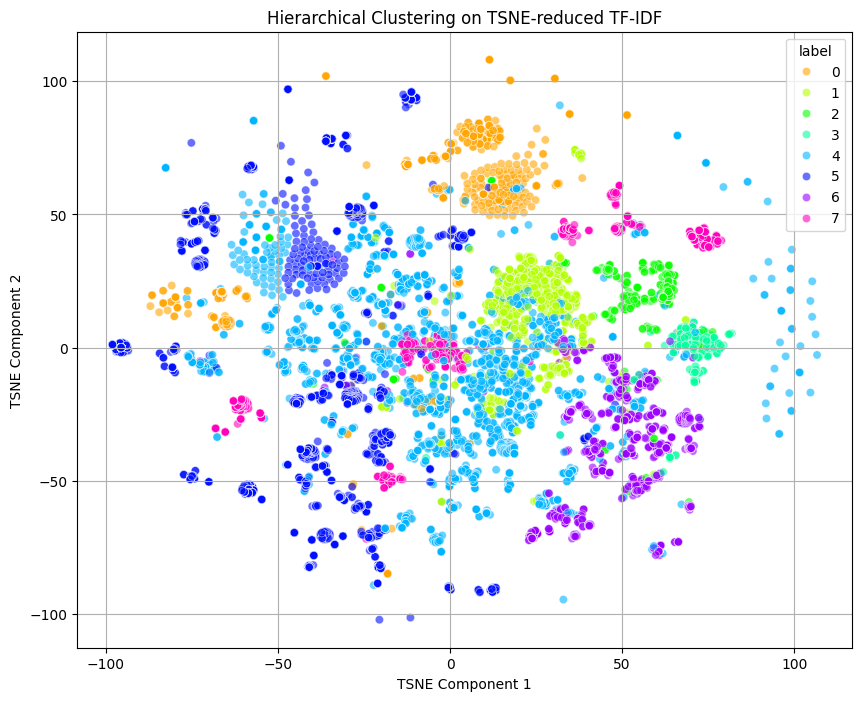

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

tfidf_newdf2 = vectorizer.fit_transform(new_df2['preprocessed_송출내용']).toarray()

# TSNE를 사용하여 2차원으로 축소
tsne_newdf2 = TSNE(n_components=2, random_state=42)
tsne_results_newdf2 = tsne_newdf2.fit_transform(tfidf_newdf2)

# 시각화를 위해 t-SNE 결과를 DataFrame으로 변환
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results_newdf2[:, 0],
    'TSNE2': tsne_results_newdf2[:, 1],
    'label': new_df2['label']  # 라벨 정보 추가
})

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette=sns.color_palette("hsv", 8), data=tsne_df, legend="full", alpha=0.6)
plt.title('Hierarchical Clustering on TSNE-reduced TF-IDF')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()


## 라벨링된 데이터프레임 csv로 저장

In [20]:
new_df2.to_csv('new_df.csv', index=False)